In [30]:
import pandas as pd
import matplotlib.pyplot as plt
# import datetime as dt

In [31]:
plt.rcParams['figure.figsize'] = [20, 20]

In [16]:
df=pd.read_csv('sample.csv',parse_dates=['Dates'],index_col='Dates',usecols=['Category','Dates'])

In [17]:
df=pd.get_dummies(df.Category)
df

,ASSAULT,DRUG/NARCOTIC,LARCENY/THEFT,NON-CRIMINAL,OTHER OFFENSES
Dates,,,,,
2015-03-06 00:25:00,0,0,0,0,1
2014-08-08 23:00:00,1,0,0,0,0
2015-03-07 00:41:00,0,0,0,1,0
2015-02-02 22:30:00,0,0,0,1,0
2015-03-17 12:11:00,0,0,0,1,0
...,...,...,...,...,...
2013-11-12 21:06:00,0,1,0,0,0
2014-07-21 18:22:00,0,1,0,0,0
2015-04-27 20:20:00,1,0,0,0,0


In [44]:
df1=df.resample('T').sum()

In [45]:
df1

,ASSAULT,DRUG/NARCOTIC,LARCENY/THEFT,NON-CRIMINAL,OTHER OFFENSES
Dates,,,,,
2013-07-09 12:45:00,0,1,0,0,0
2013-07-09 12:46:00,0,0,0,0,0
2013-07-09 12:47:00,0,0,0,0,0
2013-07-09 12:48:00,0,0,0,0,0
2013-07-09 12:49:00,0,0,0,0,0
...,...,...,...,...,...
2015-05-13 23:49:00,0,0,0,0,0
2015-05-13 23:50:00,0,0,0,0,0
2015-05-13 23:51:00,0,0,0,0,0


<AxesSubplot:xlabel='Dates'>

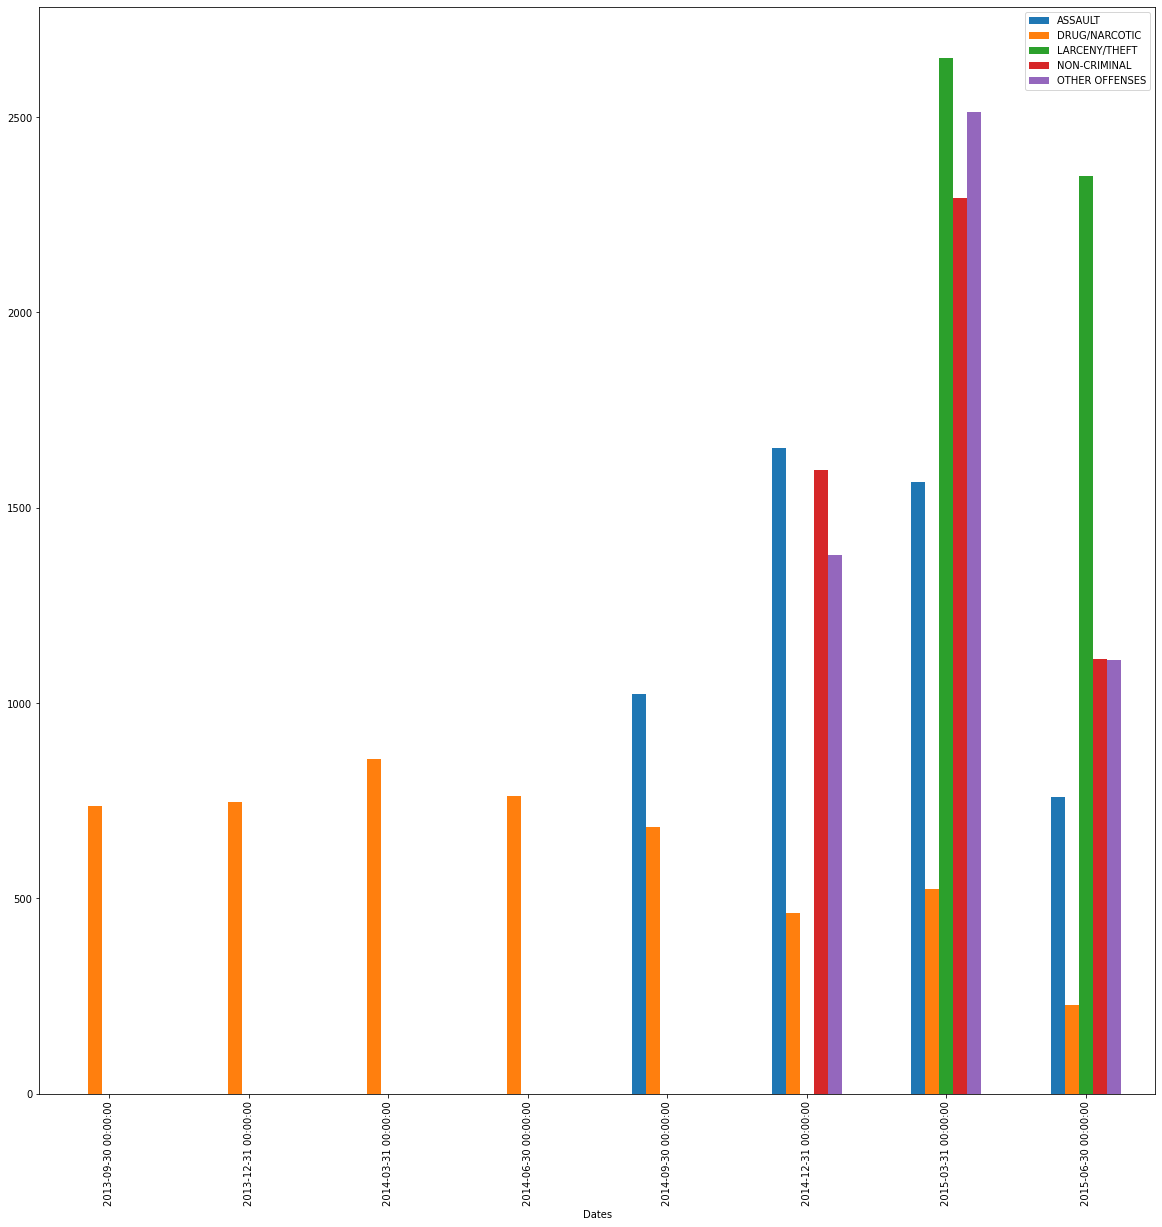

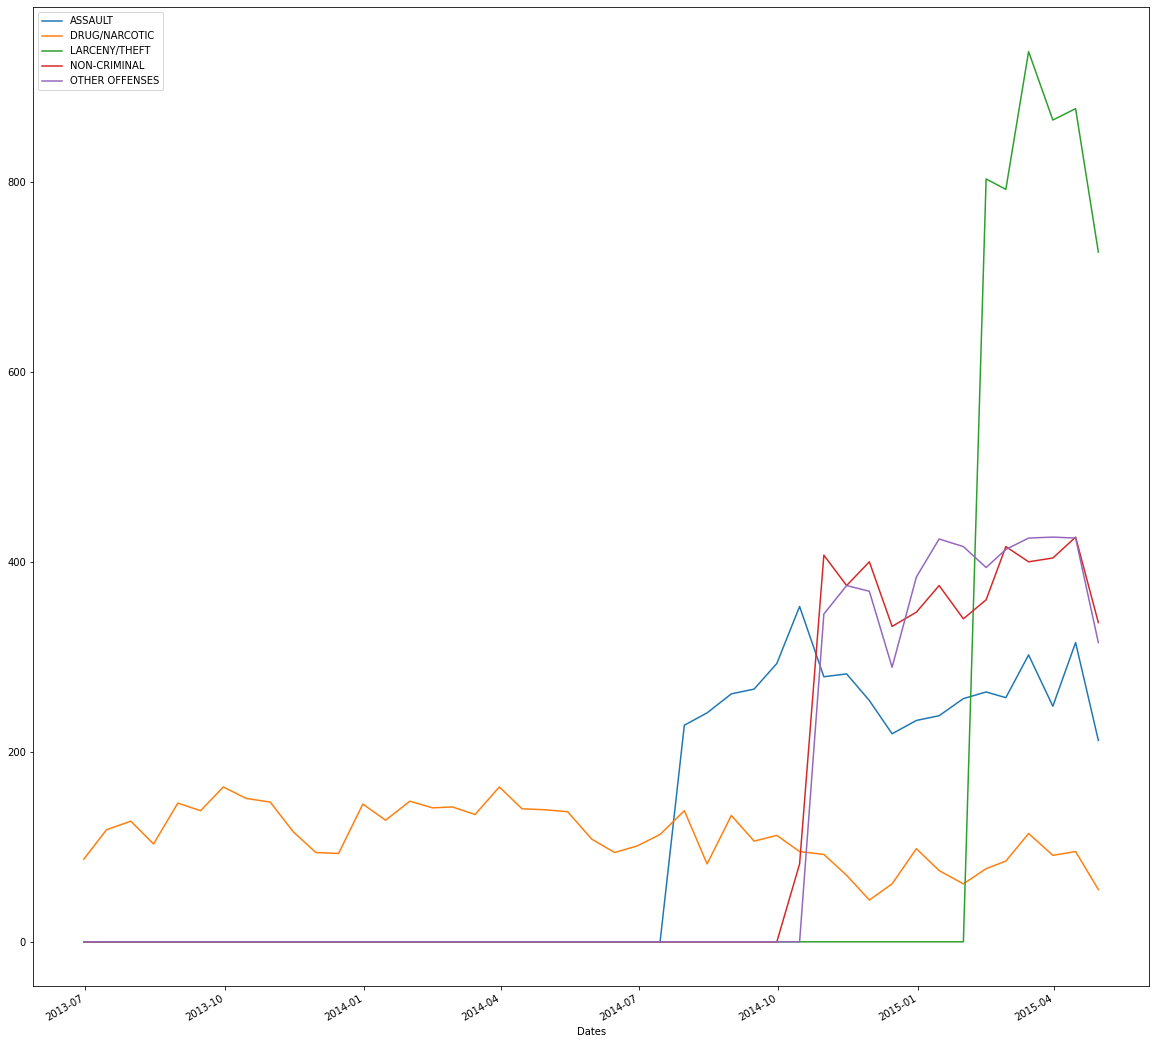

In [55]:
df.resample('Q').sum().plot(kind='bar')
df.resample('SM').sum().plot(kind='line')

In [25]:
# df.set_index('Dates',inplace=True)

In [26]:
df.head()

,Dates,Category
0,2015-03-06 00:25:00,OTHER OFFENSES
1,2014-08-08 23:00:00,ASSAULT
2,2015-03-07 00:41:00,NON-CRIMINAL
3,2015-02-02 22:30:00,NON-CRIMINAL
4,2015-03-17 12:11:00,NON-CRIMINAL


In [44]:
df.Dates=pd.to_datetime(df['Dates']).dt.date

In [69]:
n_by_date=df.groupby(['Dates','Category'],as_index=False)['Category'].count()
# n_by_date.iloc[('2013-07-09','DRUG/NARCOTIC')]
n_by_date

,Dates,Category
0,2013-07-09,20
1,2013-07-10,23
2,2013-07-11,9
3,2013-07-12,12
4,2013-07-13,15
...,...,...
715,2015-05-13,23
716,2015-05-13,10
717,2015-05-13,102
718,2015-05-13,42


In [27]:
Cat=df.Category.unique()
Cat

array(['OTHER OFFENSES', 'ASSAULT', 'NON-CRIMINAL', 'DRUG/NARCOTIC',
       'LARCENY/THEFT'], dtype=object)

In [70]:
df1=df[df.Category=='OTHER OFFENSES']
df2=df[df.Category=='ASSAULT']
df3=df[df.Category== 'NON-CRIMINAL']
df4=df[df.Category=='DRUG/NARCOTIC']
df5=df[df.Category=='LARCENY/THEFT']

In [73]:
df1=df1.groupby(['Dates'],as_index=False)['Category'].count()
df2=df2.groupby(['Dates'],as_index=False)['Category'].count()
df3=df3.groupby(['Dates'],as_index=False)['Category'].count()
df4=df4.groupby(['Dates'],as_index=False)['Category'].count()
df5=df5.groupby(['Dates'],as_index=False)['Category'].count()

In [83]:
df1.to_csv('OTHER_OFFENSES.csv')
df2.to_csv('ASSAULT.csv')
df3.to_csv('NON-CRIMINAL.csv')
df4.to_csv('DRUG_NARCOTIC.csv')
df5.to_csv('LARCENY_THEFT.csv')


In [82]:
df1[2014]

KeyError: 2014

In [80]:
df1[df1['Dates']==2014]

,Dates,Category


In [28]:
df[df.Category==Cat[0]]

,Dates,Category
0,2015-03-06 00:25:00,OTHER OFFENSES
8,2014-12-10 07:35:00,OTHER OFFENSES
12,2015-02-18 16:00:00,OTHER OFFENSES
16,2015-02-08 02:32:00,OTHER OFFENSES
29,2014-11-12 02:05:00,OTHER OFFENSES
...,...,...
24977,2015-03-19 01:20:00,OTHER OFFENSES
24982,2015-03-08 12:12:00,OTHER OFFENSES
24990,2015-03-07 13:45:00,OTHER OFFENSES
24993,2015-03-19 16:00:00,OTHER OFFENSES


In [30]:
df.groupby(by=lambda x: "%d/%d" % (x.week(), x.year())).Category.value_counts()

AttributeError: 'int' object has no attribute 'week'